In [14]:
## pandas and numpy
import pandas as pd
import numpy as np
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Importing the data

In [15]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [18]:
print(df1.shape)
df1.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
print(df2.shape)
df2.head()

(1000, 21)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Info and data description

In [10]:
def datainfo():
    print('\n\nDF1')
    print(df1.info())
    print('\n\nDF2')
    print(df2.info())

In [30]:
# datainfo()

In [27]:
# df1.describe().transpose()

In [28]:
# df2.describe().transpose()

###  Null value analysis

In [31]:
# df1.isnull().sum()
# df2.isnull().sum()

### No Null values are present.

### Lets now seperate our clean data into tests and train! 

In [33]:
df = df1.copy()
test = df2.copy()

### Data Analysis and Feature Engineering

In [40]:
def datadistrib():
    for i in df.columns:
        print(i)
        plt.figure(figsize=(10,5))
        sns.histplot(df[i],kde=True,color='b')
        plt.grid()
        plt.show()
        print('\n\n')
        plt.figure(figsize=(10,5))
        sns.boxplot(df[i],color='b')
        plt.grid()
        plt.show()

battery_power


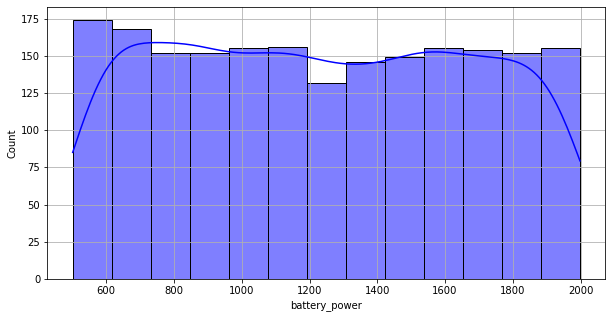

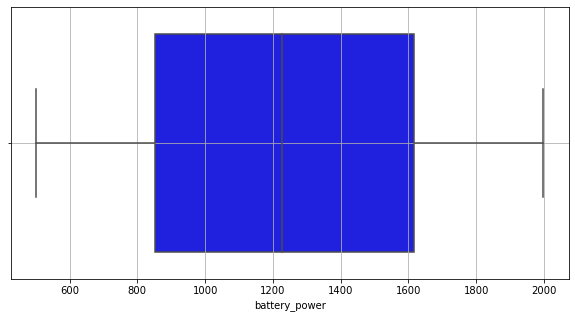

blue


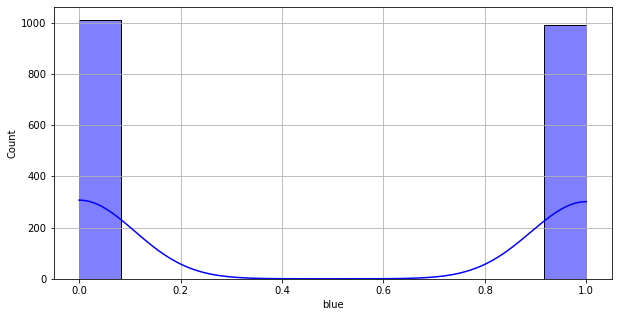

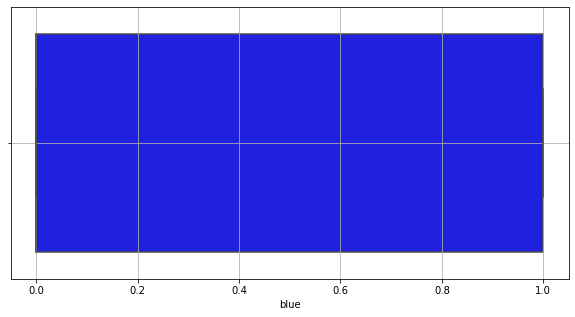

clock_speed


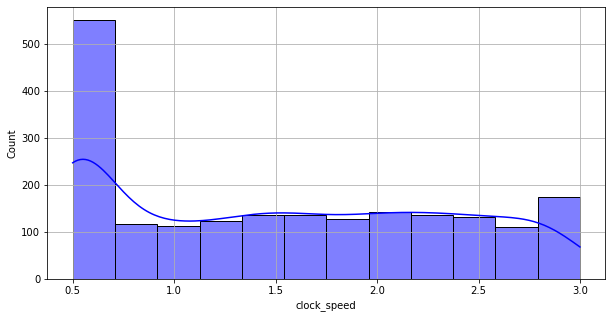

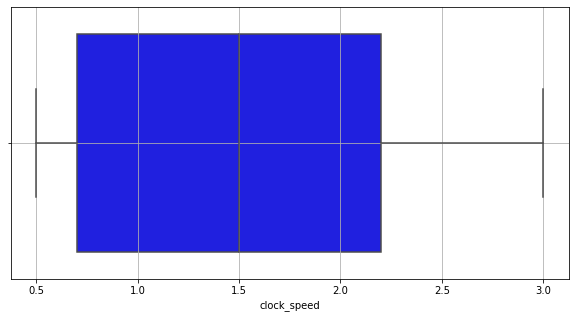

dual_sim


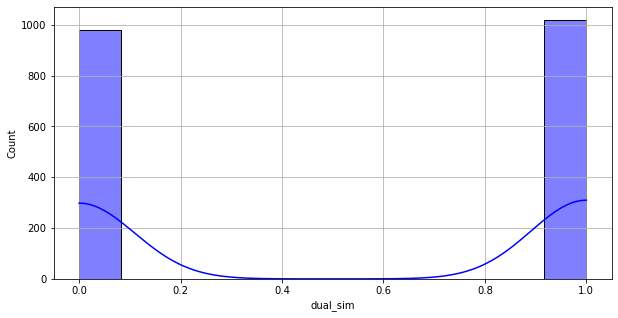

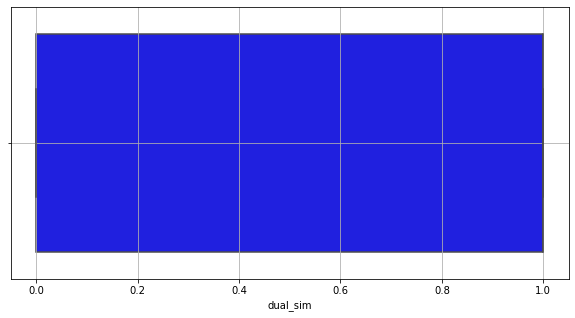

fc


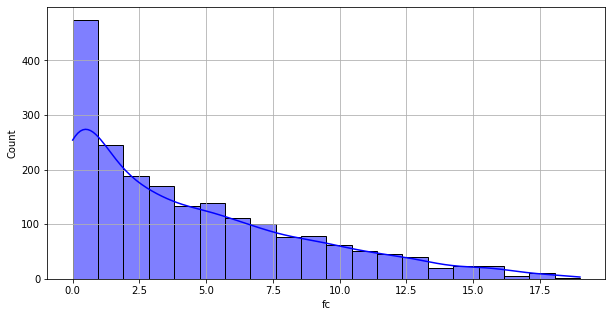

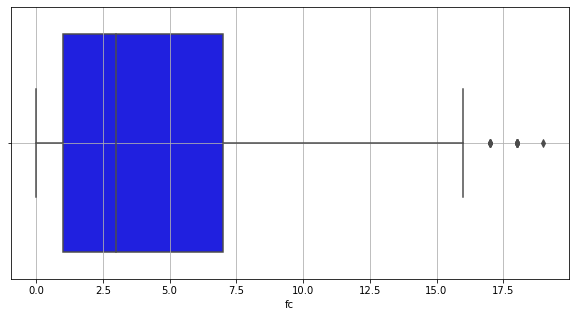

four_g


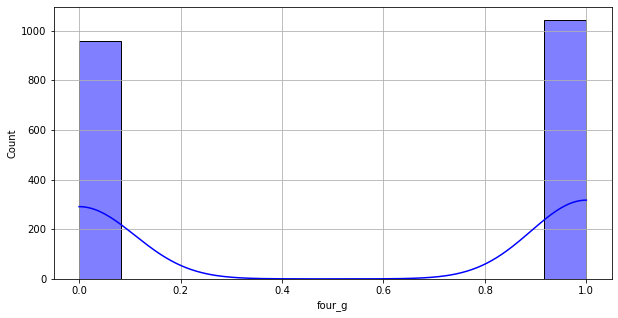

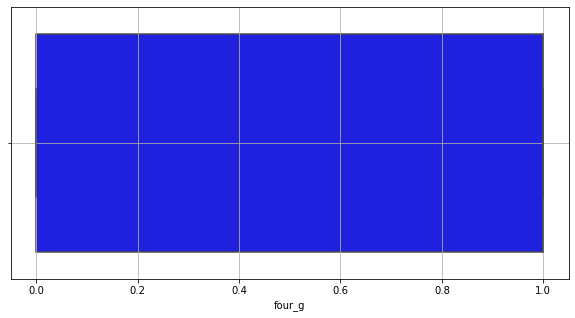

int_memory


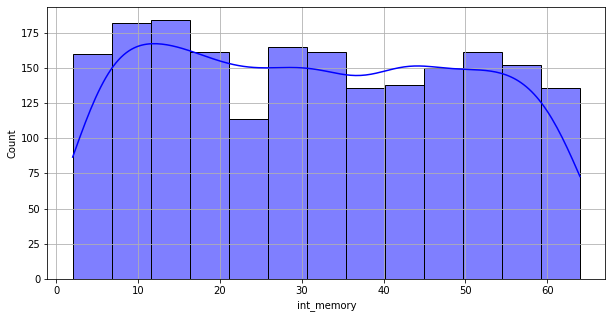

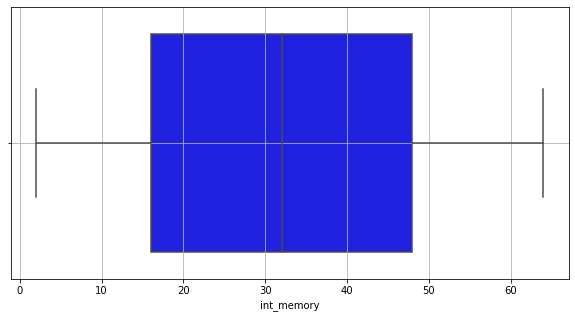

m_dep


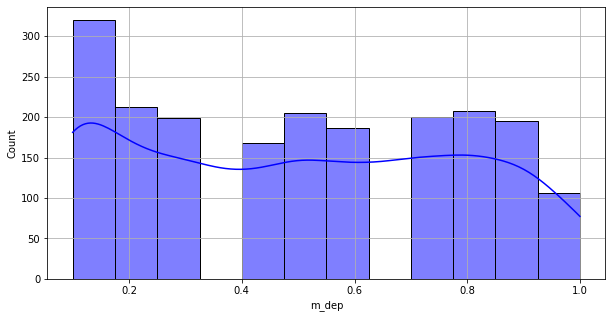

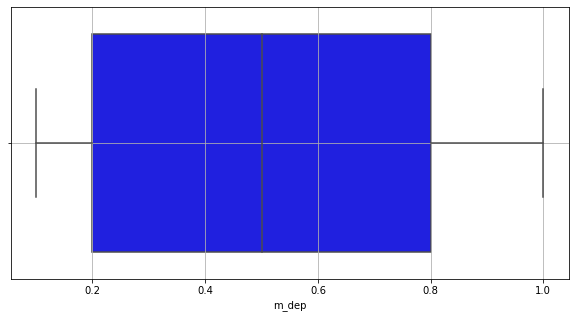

mobile_wt


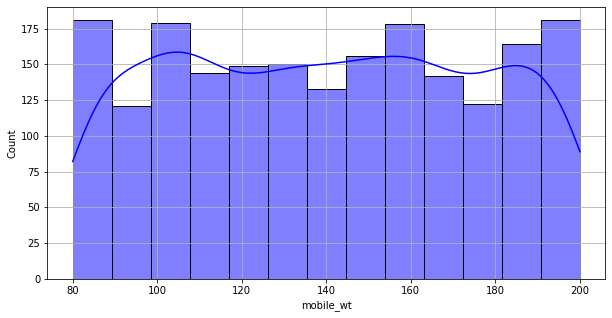

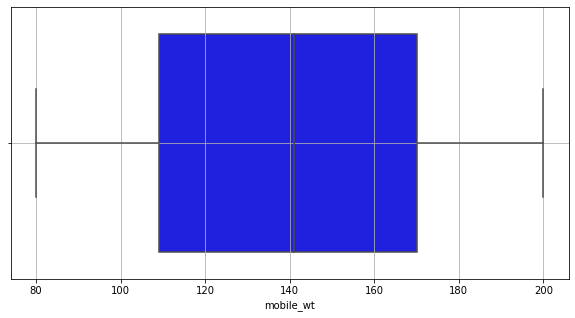

n_cores


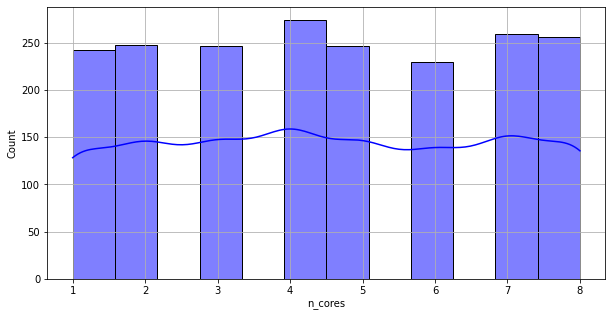

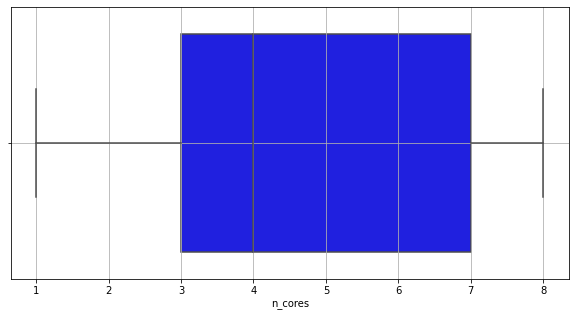

pc


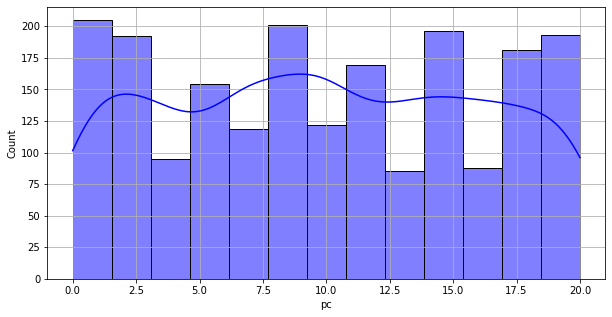

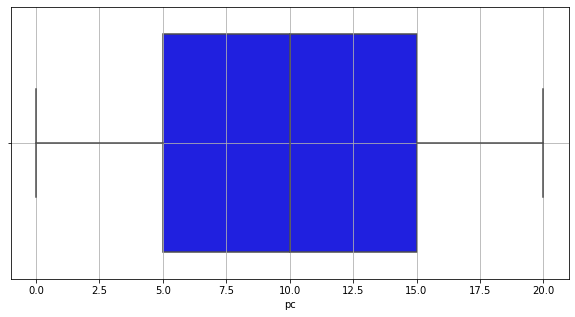

px_height


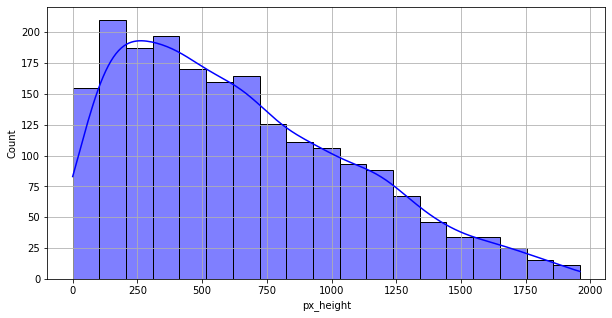

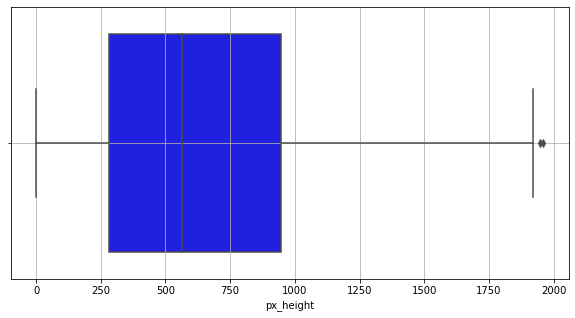

px_width


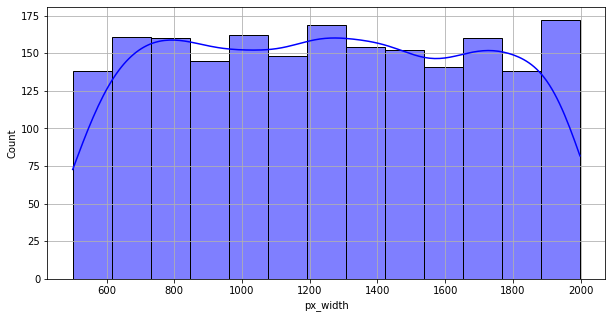

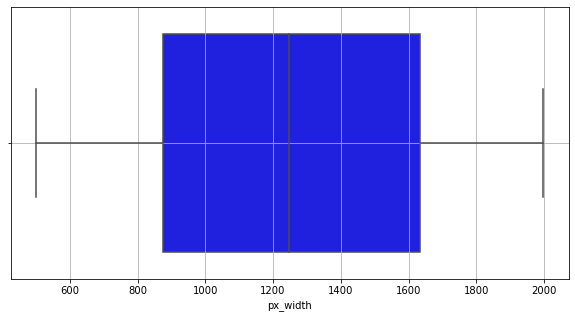

ram


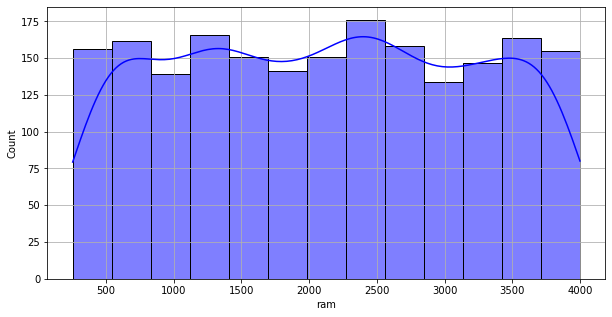

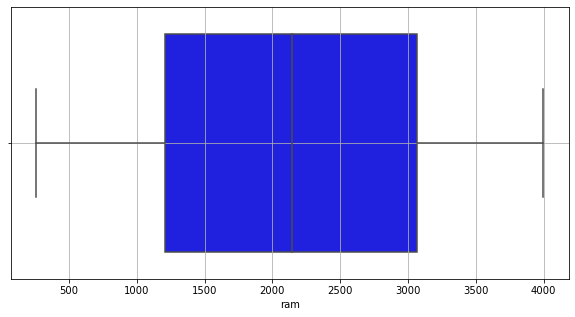

sc_h


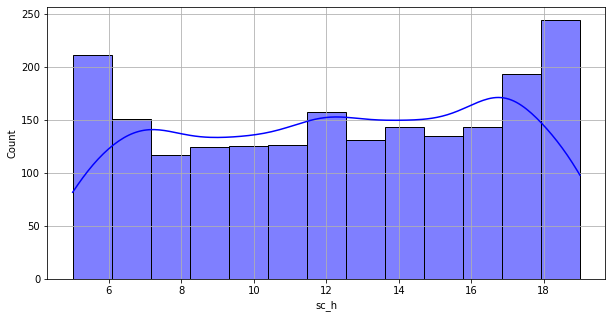

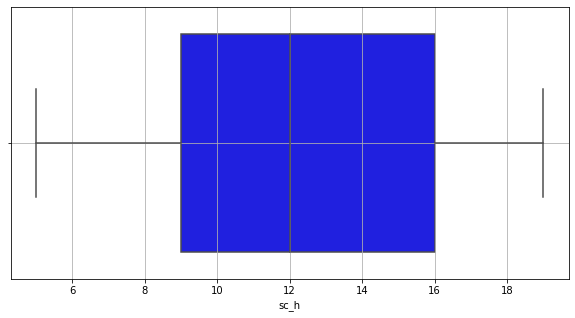

sc_w


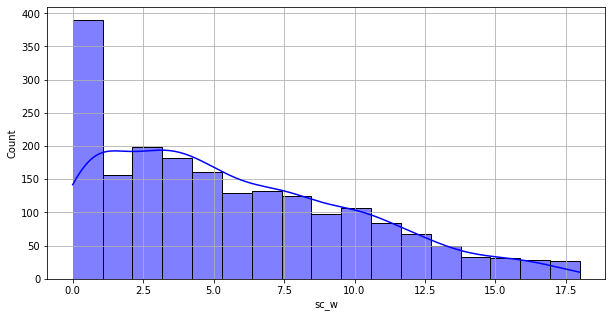

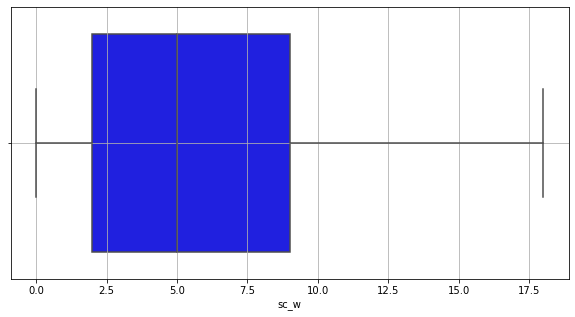

talk_time


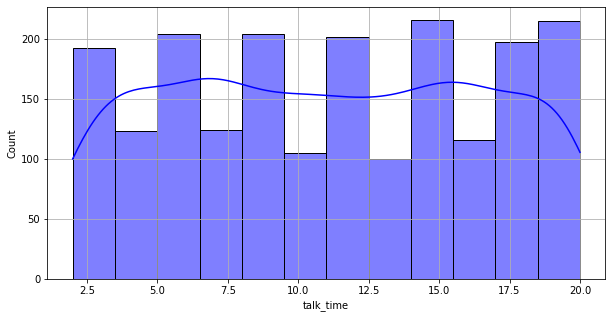

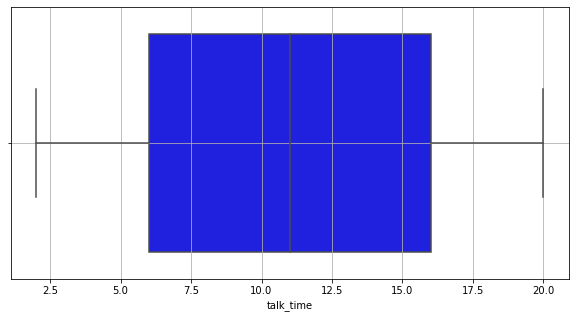

three_g


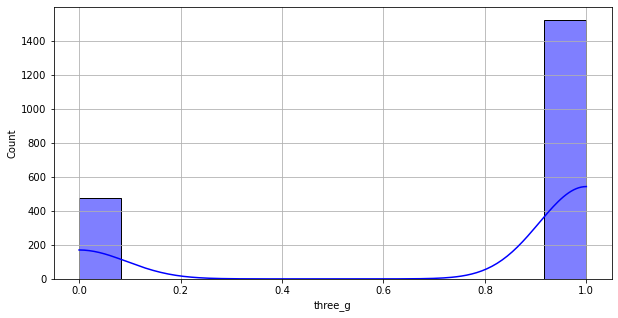

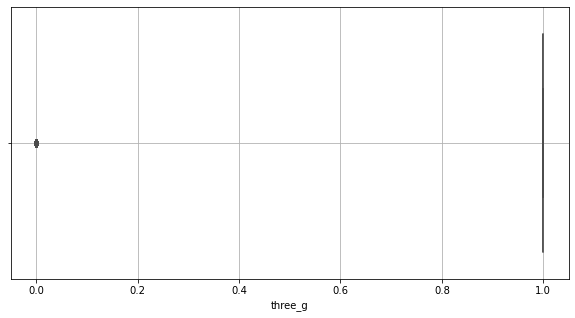

touch_screen


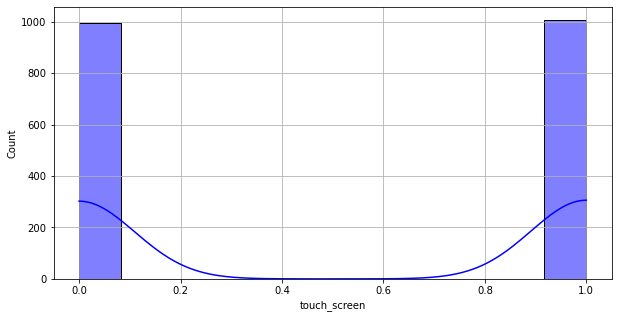

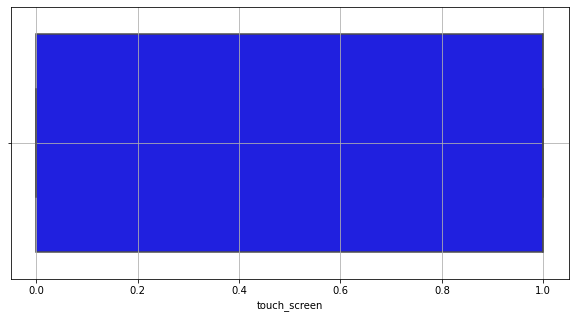

wifi


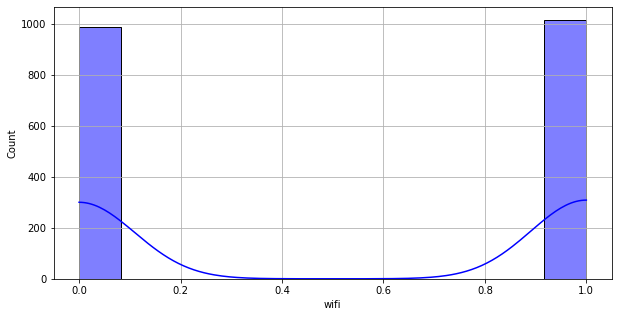

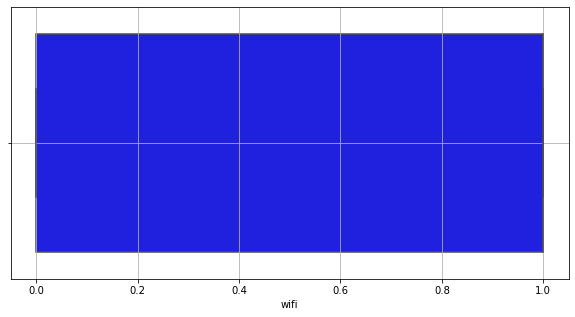

price_range


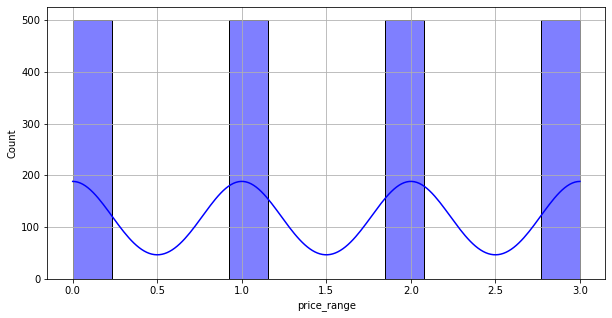

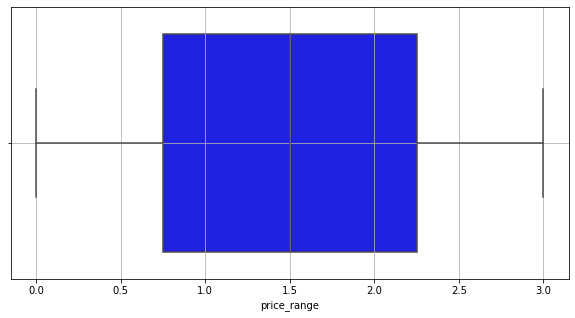

In [90]:
datadistrib()

### Except the "fc" feature, the rest of the features do not have outliers. which is good. 

### Lets see how imbalanced the data is

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


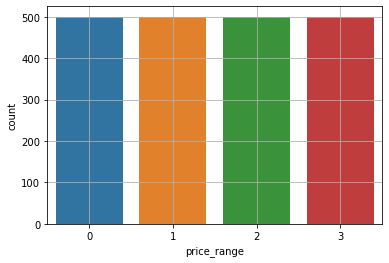

In [47]:
sns.countplot(df.price_range)
plt.grid()
print(df.price_range.value_counts())
plt.show()

### The data is perfectly balanced between the 4 classes! 

### how is battery power affecting the price range 

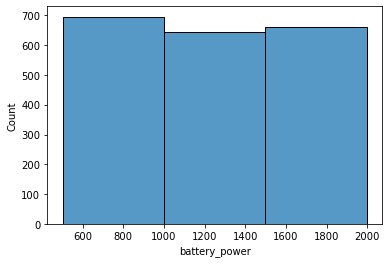

In [101]:
# sns.boxplot(df.battery_power)
sns.histplot(df.battery_power,bins=3)
# plt.grid()
plt.show()


In [95]:
# q1 = np.percentile(df.battery_power, 25, interpolation='midpoint')
# q3 = np.percentile(df.battery_power, 75, interpolation='midpoint')
# q2 = df.battery_power.median()
# iqr = q3 - q1
# print('Q1  :',q1)
# print('Q2  :',q2)
# print('Q3  :',q3)
# print('IQR :',iqr)
# print('upper range for outlier :',q3+(1.5*iqr))
# print('upper range for outlier :',q1-(1.5*iqr))

In [103]:
bpc = []
for i in df.battery_power:
    if i < 1001:
        bpc.append('low')
    elif 1001 <= i < 1501:
        bpc.append('medium')
    elif i >= 1501:
        bpc.append('high')
df['battery_power_category'] = bpc

In [105]:
col = df.pop('battery_power_category')
df.insert(1,'battery_power_category',col)

In [110]:
bpc = pd.DataFrame(df.price_range.groupby(df.battery_power_category).value_counts())
bpc['percentage'] = round(pd.DataFrame(df.price_range.groupby(df.battery_power_category).value_counts(normalize=True))*100,2)

In [116]:
op = pd.DataFrame(df.battery_power_category.groupby(df.price_range).value_counts())
op['percentage'] = round(pd.DataFrame(df.battery_power_category.groupby(df.price_range).value_counts(normalize=True))*100,2)

In [118]:
op.rename(columns={'battery_power_category':'count'})

count  percentage
price_range battery_power_category                   
0           low                       226        45.2
            medium                    167        33.4
            high                      107        21.4
1           medium                    178        35.6
            low                       169        33.8
            high                      153        30.6
2           low                       187        37.4
            high                      174        34.8
            medium                    139        27.8
3           high                      228        45.6
            medium                    157        31.4
            low                       115        23.0

In [112]:
bpc.rename(columns={'price_range':'count'})

count  percentage
battery_power_category price_range                   
high                   3              228       34.44
                       2              174       26.28
                       1              153       23.11
                       0              107       16.16
low                    0              226       32.42
                       2              187       26.83
                       1              169       24.25
                       3              115       16.50
medium                 1              178       27.77
                       0              167       26.05
                       3              157       24.49
                       2              139       21.68

In [123]:
df.battery_power.groupby(df.price_range).mean().sort_values(ascending=False)

price_range
3    1379.984
1    1228.868
2    1228.320
0    1116.902
Name: battery_power, dtype: float64

### Inference : 
1. The data makes sense, as the 34.4% of the PR3 phones have high battery capacity. 
2. only 16% of highest end PR3 phones have low capacity batteries
3. But surprisingly, 37% of the PR2 phones have low capacity batteries.
4. supporting to inference 3, the average battery capacity of a PR2 phone is only 1228. which is lower than a PR1 phone. 

In [115]:
df.battery_power_category.groupby(df.clock_speed).value_counts()

clock_speed  battery_power_category
0.5          low                       157
             high                      144
             medium                    112
0.6          low                        27
             medium                     24
                                      ... 
2.9          high                       20
             low                        18
3.0          medium                     12
             high                        9
             low                         7
Name: battery_power_category, Length: 78, dtype: int64

In [107]:
df.head()

,battery_power,battery_power_category,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
